<a href="https://colab.research.google.com/github/zouhajar/IaEmbarquee/blob/CodeCOLLAB/TP_IA_EMBARQUEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**QUESTION:** Load dataset and display some lines of the csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/ai4i2020.csv")
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

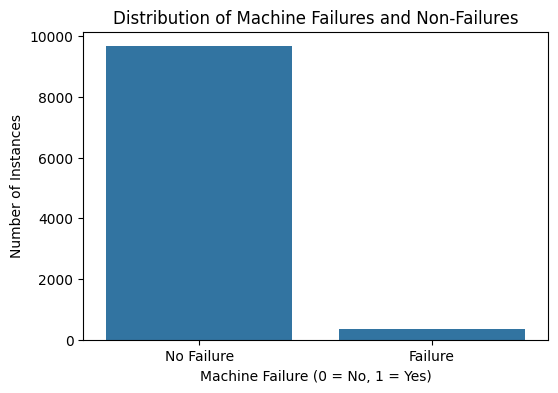

In [ ]:
# 'Machine failure' column is usually a binary indicator (0 = no failure, 1 = failure)
failure_counts = data['Machine failure'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=failure_counts.index, y=failure_counts.values)

# Customize the plot
plt.title('Distribution of Machine Failures and Non-Failures')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.show()

**ANALYSIS QUESTION:** What do you observe?

The dataset is highly imbalanced, with significantly more non-failure instances than failure instances.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

This imbalance can lead to a biased model that predicts "No Failure" most of the time, reducing its ability to correctly identify failures.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

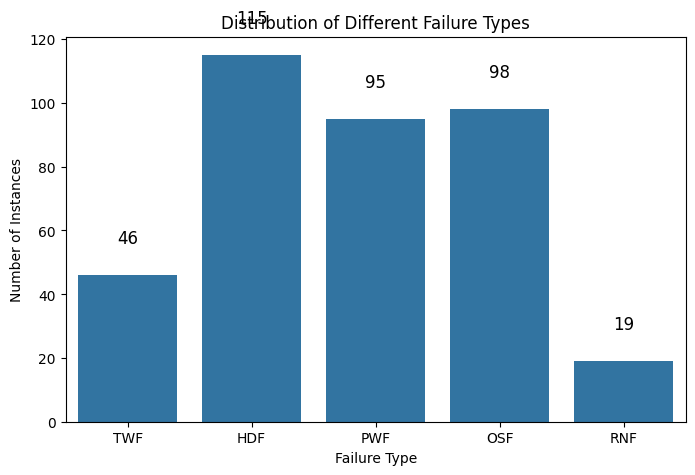

In [ ]:
# Count occurrences of each failure type
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
failure_counts = data[failure_types].sum()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=failure_counts.index, y=failure_counts.values)

# Display values above each bar
for i, v in enumerate(failure_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.xlabel("Failure Type")
plt.ylabel("Number of Instances")
plt.title("Distribution of Different Failure Types")
plt.show()


**ANALYSIS QUESTION:** What do you observe?

HDF is the most common failure, while RNF is the least frequent. The imbalance may affect model learning.

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

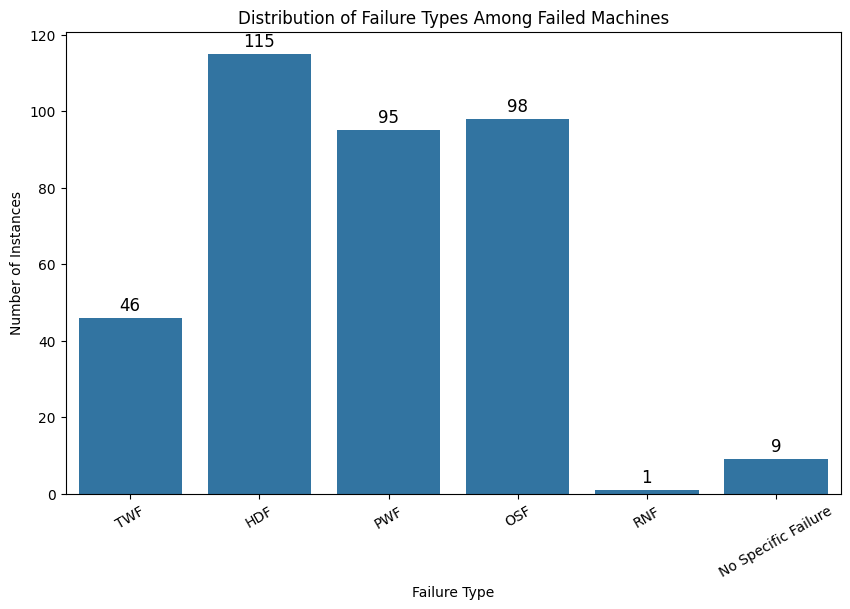

In [ ]:
# Filtrer les machines en échec (Machine failure == 1)
failed_machines = data[data['Machine failure'] == 1]

# Compter les occurrences de chaque type de panne
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = failed_machines[failure_types].sum()

# Ajouter la catégorie "No Specific Failure"
no_specific_failure = (failed_machines[failure_types].sum(axis=1) == 0).sum()
failure_counts['No Specific Failure'] = no_specific_failure

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values)

# Ajouter les valeurs au-dessus des barres
for i, value in enumerate(failure_counts.values):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12)

# Personnalisation du graphique
plt.title("Distribution of Failure Types Among Failed Machines")
plt.xlabel("Failure Type")
plt.ylabel("Number of Instances")
plt.xticks(rotation=30)
plt.show()



**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

Some categories have fewer instances, and a new "No Specific Failure" bar has appeared. This suggests that some machines were previously counted under specific failures even though they had none of the five identified failures.

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [ ]:
print(data.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

**Inputs:**
Air temperature, Process temperature, Rotational speed, Torque, Tool wear (sensor readings).

**Outputs:**
*   Machine failure (binary classification).
*   Outputs: No Failure, TWF, HDF, PWF, OSF (multi-label classification for failure type).

**Justification:**
RNF (Random Failure) is removed because it does not follow a predictable pattern and could introduce noise into the model. Adding "No Failure" ensures that the model can also recognize normal operating conditions, making predictions more meaningful.

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
from sklearn.model_selection import train_test_split

# Modifier la colonne "Machine failure" en "Machine no failure"
data['Machine no failure'] = 1 - data['Machine failure']

# Définition des entrées (features) et sorties (labels)
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y = data[['Machine no failure', 'TWF', 'HDF', 'PWF', 'OSF']]  # RNF supprimé

# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



print(data)
# Affichage des tailles des ensembles
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_test: {Y_test.shape}")


        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure

Split the dataset (80% train, 20% test) without rebalancing

**QUESTION** Code below the model architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Définition du modèle MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Couche d'entrée
    Dropout(0.2),  # Régularisation pour éviter l'overfitting
    Dense(32, activation='relu'),  # Couche cachée
    Dropout(0.2),
    Dense(Y_train.shape[1], activation='sigmoid')  # Couche de sortie pour multi-label
])

# Compilation du modèle (loss adaptée au multi-label)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2,629
Trainable params: 2,629
Non-trainable params: 0
_________________________________________________________________


**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

Epoch 1/50
250/250 [==============================] - 5s 13ms/step - loss: 3.7682 - accuracy: 0.8929 - val_loss: 0.3280 - val_accuracy: 0.9705
Epoch 2/50
250/250 [==============================] - 3s 10ms/step - loss: 0.6106 - accuracy: 0.9389 - val_loss: 0.1027 - val_accuracy: 0.9705
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 0.2926 - accuracy: 0.9567 - val_loss: 0.0816 - val_accuracy: 0.9705
Epoch 4/50
250/250 [==============================] - 2s 6ms/step - loss: 0.1952 - accuracy: 0.9622 - val_loss: 0.0642 - val_accuracy: 0.9705
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.1491 - accuracy: 0.9624 - val_loss: 0.0682 - val_accuracy: 0.9705
Epoch 6/50
250/250 [==============================] - 2s 6ms/step - loss: 0.1188 - accuracy: 0.9641 - val_loss: 0.0636 - val_accuracy: 0.9705
Epoch 7/50
250/250 [==============================] - 2s 6ms/step - loss: 0.1127 - accuracy: 0.9651 - val_loss: 0.0623 - val_accuracy: 0.9705
Epoc

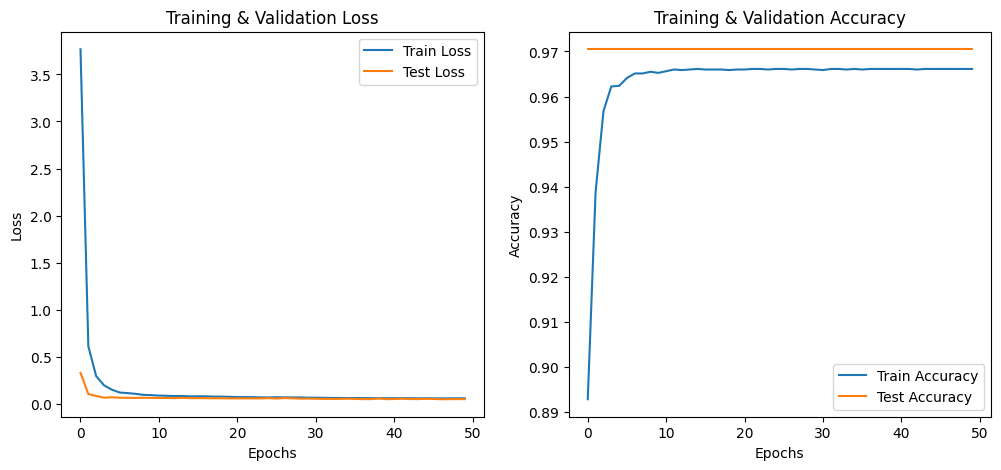

In [ ]:
import matplotlib.pyplot as plt

# Entraînement du modèle
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Tracé des courbes de perte et d’accuracy
plt.figure(figsize=(12, 5))

# Courbe de perte (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()



**QUESTION** Plot the confusion matrix and the classification report

63/63 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        18

   micro avg       0.97      0.97      0.97      2005
   macro avg       0.19      0.20      0.20      2005
weighted avg       0.94      0.97      0.95      2005
 samples avg       0.97      0.97      0.97      2005



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


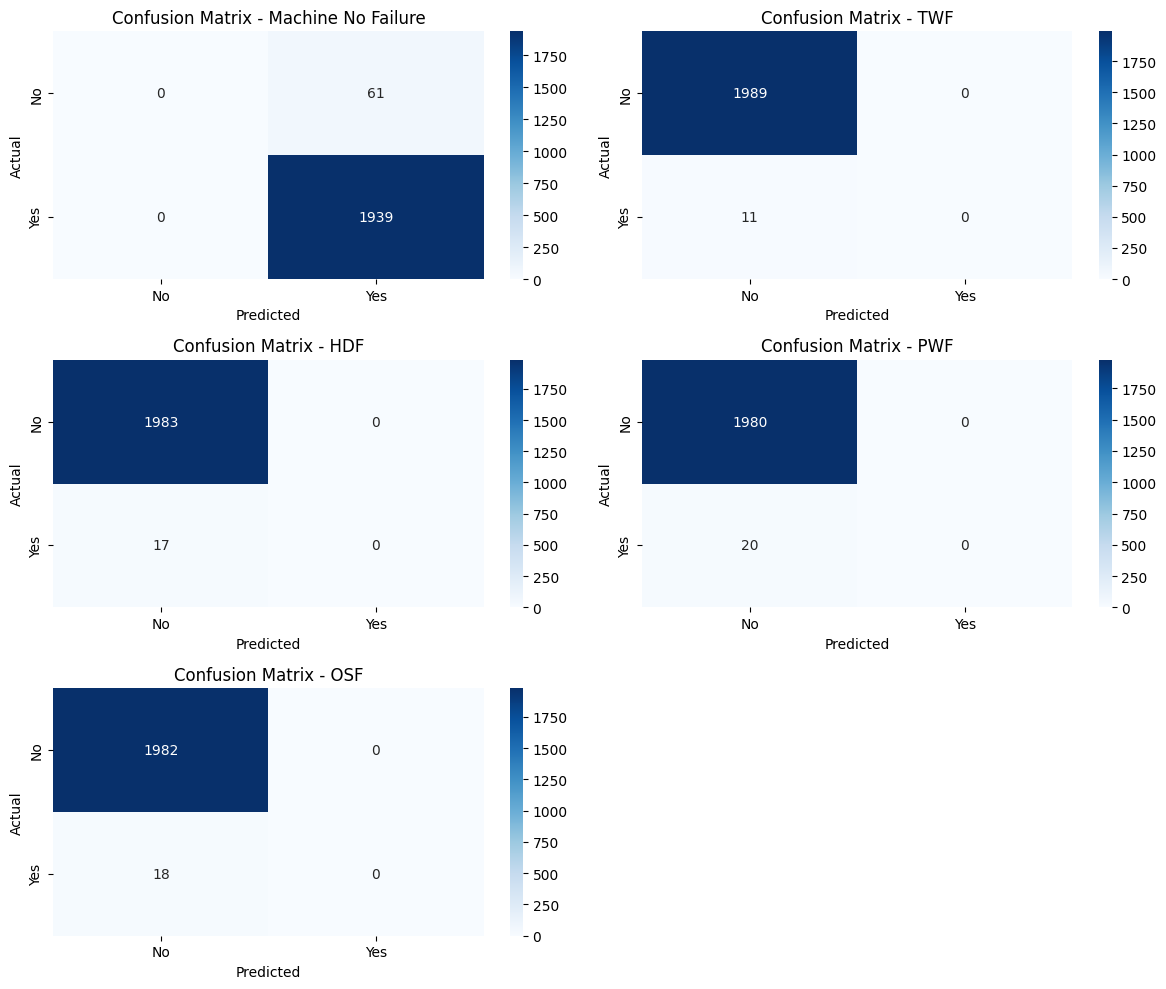

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import seaborn as sns
import numpy as np

# Prédictions sur l’ensemble de test
Y_pred = model.predict(X_test)
Y_pred_binary = (Y_pred > 0.5).astype(int)  # Conversion en valeurs binaires

# Affichage du rapport de classification
print("Classification Report:\n", classification_report(Y_test, Y_pred_binary))

# Matrices de confusion pour chaque classe
labels = ["Machine No Failure", "TWF", "HDF", "PWF", "OSF"]
conf_matrices = multilabel_confusion_matrix(Y_test, Y_pred_binary)

plt.figure(figsize=(12, 10))
for i, (label, cm) in enumerate(zip(labels, conf_matrices)):
    plt.subplot(3, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {label}")

plt.tight_layout()
plt.show()


**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





**ANALYSIS QUESTION** What do you observe? What can you conclude?

unbalanced


## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Étape 1 : Filtrer les lignes avec un seul label actif
mask = (Y_train.sum(axis=1) == 1)  # Garder uniquement les lignes avec un seul 1
X_train_filtered = X_train[mask]
Y_train_filtered = Y_train[mask]

# Étape 2 : Convertir Y_train_filtered en une seule colonne (classe)
Y_train_single_label = Y_train_filtered.idxmax(axis=1)  # Trouver le label actif

# Étape 3 : Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_filtered, Y_train_single_label)

# Étape 4 : Reconvertir Y_train_resampled en DataFrame (one-hot encoding) avec 0 et 1
Y_train_resampled = pd.get_dummies(Y_train_resampled).astype(int)

# Vérification des dimensions après traitement
print("X_train shape après SMOTE:", X_train_resampled.shape)
print("Y_train shape après SMOTE:", Y_train_resampled.shape)

# Affichage des premières lignes du DataFrame
print(Y_train_resampled.head())

X_train shape après SMOTE: (38610, 5)
Y_train shape après SMOTE: (38610, 5)
   HDF  Machine no failure  OSF  PWF  TWF
0    0                   1    0    0    0
1    0                   1    0    0    0
2    0                   1    0    0    0
3    0                   1    0    0    0
4    0                   1    0    0    0


In [ ]:
# Afficher le nombre d'échantillons pour chaque label après SMOTE
label_counts = Y_train_resampled.sum()
print("Nombre d'échantillons par label après SMOTE :")
print(label_counts)

# Afficher également les dimensions de X_train et Y_train après SMOTE
print("\nX_train shape après SMOTE:", X_train_resampled.shape)
print("Y_train shape après SMOTE:", Y_train_resampled.shape)


Nombre d'échantillons par label après SMOTE :
HDF                   7722
Machine no failure    7722
OSF                   7722
PWF                   7722
TWF                   7722
dtype: int64

X_train shape après SMOTE: (38610, 5)
Y_train shape après SMOTE: (38610, 5)


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               768       
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,349
Trainable params: 9,349
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1207/1207 [==============================

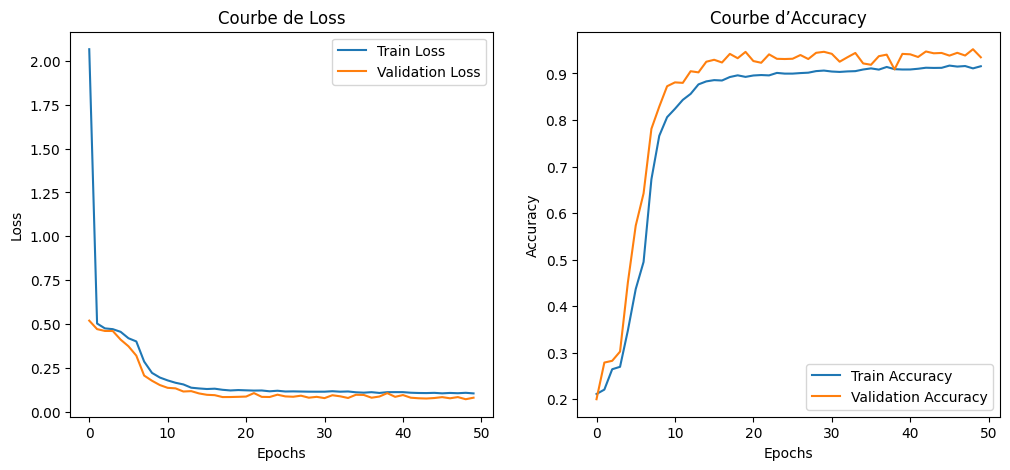

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Réduction du surajustement
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='sigmoid')  # Multi-label → Sigmoid pour sortie entre 0 et 1
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


history = model.fit(X_train_resampled, Y_train_resampled,
                    validation_data=(X_train_resampled, Y_train_resampled),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_resampled, Y_train_resampled)
print(f"Test Accuracy: {accuracy:.4f}")


# Récupération des données d'entraînement
history_dict = history.history

# Tracer la Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()

# Tracer l'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Courbe d’Accuracy')
plt.legend()

plt.show()

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

1207/1207 [==============================] - 2s 2ms/step


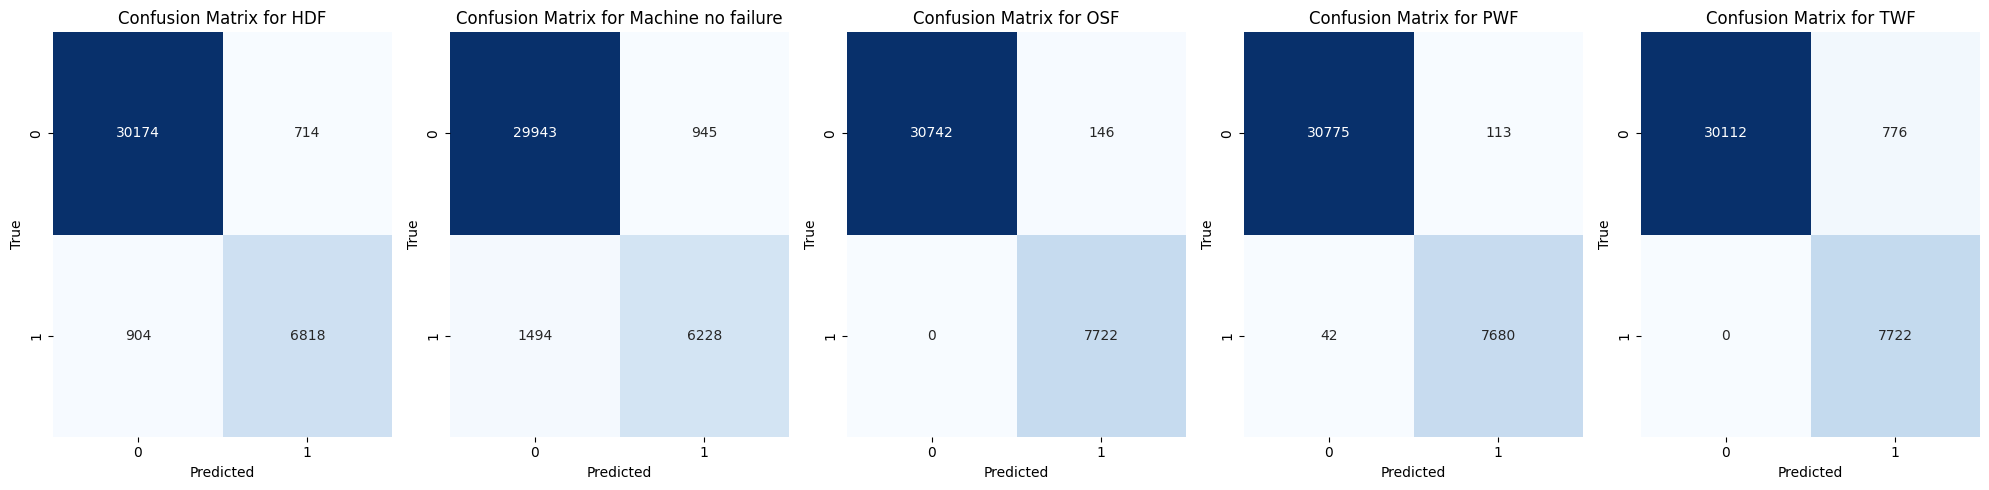

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions
y_pred = model.predict(X_train_resampled)

# Appliquer un seuil de 0.5 pour obtenir des prédictions binaires (0 ou 1)
y_pred_bin = (y_pred > 0.5).astype(int)

# Plot confusion matrix for each label
labels = ['HDF', 'Machine no failure', 'OSF', 'PWF', 'TWF']  # Labels corresponding to columns in Y_train

fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # One subplot for each label

for i, label in enumerate(labels):
    cm = confusion_matrix(Y_train_resampled.iloc[:, i], y_pred_bin[:, i])
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix for {label}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

**ANALYSIS QUESTION** What do you observe? What can you conclude?

1207/1207 [==============================] - 2s 2ms/step


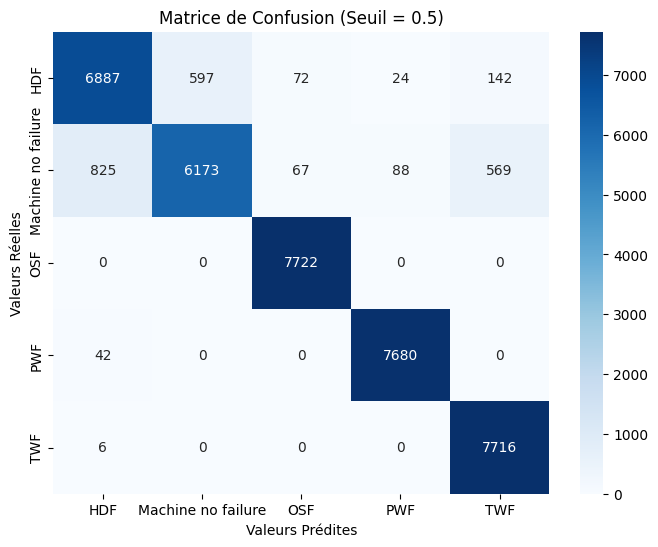

                    precision    recall  f1-score   support

               HDF       0.89      0.89      0.89      7722
Machine no failure       0.91      0.80      0.85      7722
               OSF       0.98      1.00      0.99      7722
               PWF       0.99      0.99      0.99      7722
               TWF       0.92      1.00      0.96      7722

          accuracy                           0.94     38610
         macro avg       0.94      0.94      0.94     38610
      weighted avg       0.94      0.94      0.94     38610



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_train_resampled)

# Appliquer un seuil (tu peux tester avec 0.3, 0.4, etc.)
threshold = 0.5
y_pred_bin = (y_pred > threshold).astype(int)

# Convertir les sorties multi-label en une seule classe par échantillon
y_true_labels = np.argmax(Y_train_resampled.values, axis=1)
y_pred_labels = np.argmax(y_pred_bin, axis=1)

# Calcul de la matrice de confusion multi-classe
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Affichage de la matrice de confusion unique
labels = ['HDF', 'Machine no failure', 'OSF', 'PWF', 'TWF']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.title(f"Matrice de Confusion (Seuil = {threshold})")
plt.show()

# Rapport de classification
report = classification_report(y_true_labels, y_pred_labels, target_names=labels, zero_division=1)
print(report)


"Write your response here"

In [ ]:
import numpy as np

np.save("y_test_ia.npy", X_test)
np.save("x_test_ia.npy", Y_test)
model.save("model_ia.h5")